In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"A:\my_codes\my_project\Machine Learning\Supervised Machine Learning\Regression\Lasso Regression\Diamond Price Prediction\diamonds.csv.zip",encoding='unicode_escape')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='str')

In [4]:
df['cut'].unique()

<ArrowStringArray>
['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Length: 5, dtype: str

In [5]:
df['color'].unique()

<ArrowStringArray>
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Length: 7, dtype: str

In [6]:
df['clarity'].unique()

<ArrowStringArray>
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Length: 8, dtype: str

In [7]:
df['cut'] = df['cut'].map({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5})
df['color'] = df['color'].map({'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7})
df['clarity'] = df['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8})
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,5,1,3,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,2,1,3,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,3,1,3,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,4,5,2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
X = df[['Unnamed: 0','carat','cut','color','clarity','depth','table','x','y','z']]
Y = df[['price']]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [10]:
lasso_cv = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, max_iter=10000)
lasso_cv.fit(X_train.fillna(X_train.median()), Y_train)
best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)

a:\my_codes\my_project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha: 1.151395399326447


In [11]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lasso', Lasso(alpha=best_alpha))
])

In [12]:
X_train

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
26546,26547,2.01,2,3,2,58.1,64.0,8.23,8.19,4.77
9159,9160,1.01,3,2,2,60.0,60.0,6.57,6.49,3.92
14131,14132,1.10,4,5,4,62.5,58.0,6.59,6.54,4.10
15757,15758,1.50,2,2,2,61.5,65.0,7.21,7.17,4.42
24632,24633,1.52,3,4,5,62.1,57.0,7.27,7.32,4.53
...,...,...,...,...,...,...,...,...,...,...
11284,11285,1.05,3,6,4,62.4,59.0,6.48,6.51,4.05
44732,44733,0.47,5,1,5,61.0,55.0,5.03,5.01,3.06
38158,38159,0.33,3,3,8,60.3,58.0,4.49,4.46,2.70
860,861,0.90,4,7,3,62.8,59.0,6.13,6.03,3.82


In [13]:
Y_train

,price
26546,16231
9159,4540
14131,5729
15757,6300
24632,12968
...,...
11284,4975
44732,1617
38158,1014
860,2871


In [14]:
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
Y_pred

a:\my_codes\my_project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.270e+08, tolerance: 6.870e+07
  model = cd_fast.enet_coordinate_descent(


array([ -903.60398796,  2538.14959009,  1487.80980349, ...,
         860.20885012, 10040.58574046,  2969.54700594], shape=(10788,))

In [15]:
X_test

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
1388,1389,0.24,5,4,7,62.1,56.0,3.97,4.00,2.47
50052,50053,0.58,3,3,6,60.0,57.0,5.44,5.42,3.26
41645,41646,0.40,5,2,6,62.1,55.0,4.76,4.74,2.95
42377,42378,0.43,4,2,6,60.8,57.0,4.92,4.89,2.98
17244,17245,1.55,5,2,2,62.3,55.0,7.44,7.37,4.61
...,...,...,...,...,...,...,...,...,...,...
44081,44082,0.50,3,2,5,61.6,59.0,5.06,5.14,3.14
23713,23714,0.25,3,3,6,61.6,57.0,4.05,4.07,2.50
31375,31376,0.31,2,4,7,58.0,62.0,4.42,4.47,2.58
21772,21773,1.23,5,3,5,62.5,54.0,6.85,6.82,4.27


In [16]:
Y_test

,price
1388,559
50052,2201
41645,1238
42377,1304
17244,6901
...,...
44081,1554
23713,633
31375,761
21772,9836


In [17]:
y_pred = pipeline.predict(X_test)
print("R²:", r2_score(Y_test, y_pred))

R²: 0.9740787085054472


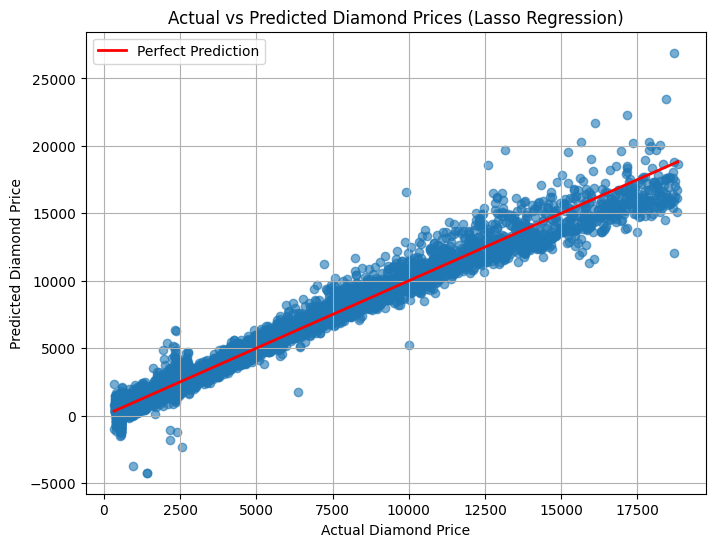

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, alpha=0.6)
plt.plot(
    [Y_test.min(), Y_test.max()],
    [Y_test.min(), Y_test.max()],
    color='red',
    linewidth=2,
    label='Perfect Prediction'
)
plt.xlabel("Actual Diamond Price")
plt.ylabel("Predicted Diamond Price")
plt.title("Actual vs Predicted Diamond Prices (Lasso Regression)")
plt.legend()
plt.grid(True)
plt.show()